The logistic regression problem
fast gradient
algorithm to solve the `
2
2
-regularized logistic regression

In [1]:
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.linalg
import sklearn.linear_model
import sklearn.preprocessing
import os
import re
import sys
#import tensorflow as tf
#import tensorflow.python.platform
#from tensorflow.python.platform import gfile
import numpy as np
import pandas as pd
import sklearn
from sklearn import cross_validation
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC, LinearSVC
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV

C:\Users\abhanand\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
features = pd.read_csv('train_features/train_features.csv')
labels = pd.read_csv('train_features/train_labels.csv')

In [3]:
features = np.asarray(features.iloc[:,1:])
#labels = np.asarray(labels.iloc[:,0])
labels=np.asarray(labels.iloc[:,1])

In [6]:
x_train, X_test, y_train, y_test = cross_validation.train_test_split(features, labels, test_size=0.2, random_state=42)

In [9]:
features.shape

(4320, 2048)

In [10]:
d = np.size(features, 1)
d

2048

In [14]:
type(x_train)

numpy.ndarray

In [15]:
type(y_train)

numpy.ndarray

In [16]:
y_train

array(['096.Hooded_Oriole', '154.Red_eyed_Vireo', '129.Song_Sparrow', ...,
       '091.Mockingbird', '114.Black_throated_Sparrow', '061.Heermann_Gull'], dtype=object)

In [17]:
y_train =[y_train[i].split('.')[0] for i in range (len(y_train))]
y_train = [y_train[i].lstrip('0') for i in range (len(y_train))]
y_train

['96',
 '154',
 '129',
 '73',
 '56',
 '131',
 '108',
 '130',
 '177',
 '163',
 '164',
 '199',
 '198',
 '31',
 '46',
 '156',
 '90',
 '121',
 '42',
 '172',
 '38',
 '46',
 '154',
 '74',
 '11',
 '91',
 '66',
 '67',
 '55',
 '195',
 '172',
 '138',
 '197',
 '156',
 '90',
 '74',
 '74',
 '92',
 '35',
 '94',
 '100',
 '82',
 '182',
 '86',
 '63',
 '129',
 '200',
 '26',
 '72',
 '13',
 '27',
 '55',
 '139',
 '42',
 '158',
 '143',
 '74',
 '146',
 '79',
 '21',
 '30',
 '79',
 '164',
 '36',
 '192',
 '144',
 '98',
 '106',
 '87',
 '111',
 '86',
 '96',
 '194',
 '114',
 '191',
 '55',
 '49',
 '134',
 '38',
 '185',
 '45',
 '44',
 '189',
 '70',
 '134',
 '80',
 '104',
 '127',
 '121',
 '134',
 '89',
 '50',
 '139',
 '13',
 '56',
 '59',
 '2',
 '108',
 '180',
 '45',
 '45',
 '68',
 '88',
 '165',
 '158',
 '11',
 '63',
 '137',
 '128',
 '69',
 '95',
 '134',
 '191',
 '79',
 '134',
 '120',
 '185',
 '36',
 '49',
 '10',
 '2',
 '184',
 '123',
 '142',
 '165',
 '62',
 '67',
 '132',
 '134',
 '46',
 '138',
 '42',
 '55',
 '68',
 '

In [18]:
y_train = np.asarray(y_train)

In [19]:
type(y_train)

numpy.ndarray

In [21]:
y_train= y_train.astype(np.float)
y_train

array([  96.,  154.,  129., ...,   91.,  114.,   61.])

In [23]:
x_train= x_train.astype(np.float)
x_train

array([[ 0.36448219,  0.07054285,  0.12489847, ...,  0.30321985,
         0.28479016,  0.25969547],
       [ 0.21976773,  0.23260818,  0.16962634, ...,  0.69476813,
         0.47558868,  0.75038147],
       [ 0.1832563 ,  0.34106845,  0.24548718, ...,  0.22313771,
         0.31937256,  0.3162438 ],
       ..., 
       [ 0.23641582,  0.06476711,  0.07434279, ...,  0.30226091,
         0.40902779,  0.12272959],
       [ 0.13382359,  0.10050244,  0.25402451, ...,  0.10091858,
         0.17471801,  0.46125889],
       [ 0.04868646,  0.19089422,  0.16128814, ...,  0.38180187,
         0.61720556,  0.17495106]])

In [24]:

# Part (d): Function for the gradient
def computegrad(beta, lambduh, x=x_train, y=y_train):
    yx = y[:, np.newaxis]*x
    denom = 1+np.exp(-yx.dot(beta))
    grad = 1/len(y)*np.sum(-yx*np.exp(-yx.dot(beta[:, np.newaxis]))/denom[:, np.newaxis], axis=0) + 2*lambduh*beta
    return grad


# Part (e): Backtracking line search (and objective function)
def objective(beta, lambduh, x=x_train, y=y_train):
    return 1/len(y) * np.sum(np.log(1 + np.exp(-y*x.dot(beta)))) + lambduh * np.linalg.norm(beta)**2


def bt_line_search(beta, lambduh, eta=1, alpha=0.5, betaparam=0.8,
                   maxiter=100, x=x_train, y=y_train):
    grad_beta = computegrad(beta, lambduh, x=x, y=y)
    norm_grad_beta = np.linalg.norm(grad_beta)
    found_eta = 0
    iter = 0
    while found_eta == 0 and iter < maxiter:
        if objective(beta - eta * grad_beta, lambduh, x=x, y=y) < objective(beta, lambduh, x=x, y=y) \
                - alpha * eta * norm_grad_beta ** 2:
            found_eta = 1
        elif iter == maxiter:
            raise ('Max number of iterations of backtracking'
                   ' line search reached')
        else:
            eta *= betaparam
            iter += 1
    return eta


# Part (f): Gradient descent algorithm
def graddescent(beta_init, lambduh, eta_init, maxiter, x=x_train, y=y_train):
    beta = beta_init
    grad_beta = computegrad(beta, lambduh, x=x, y=y)
    beta_vals = beta
    iter = 0
    while iter < maxiter:
        eta = bt_line_search(beta, lambduh, eta=eta_init, x=x, y=y)
        beta = beta - eta*grad_beta
        # Store all of the places we step to
        beta_vals = np.vstack((beta_vals, beta))
        grad_beta = computegrad(beta, lambduh, x=x, y=y)
        iter += 1
        if iter % 100 == 0:
            print('Gradient descent iteration', iter)
    return beta_vals


# Part (g): Fast gradient algorithm
def fastgradalgo(beta_init, theta_init, lambduh, eta_init, maxiter, x=x_train, y=y_train):
    beta = beta_init
    theta = theta_init
    grad_theta = computegrad(theta, lambduh, x=x, y=y)
    theta_vals = theta
    iter = 0
    while iter < maxiter:
        eta = bt_line_search(theta, lambduh, eta=eta_init, x=x, y=y)
        beta_new = theta - eta*grad_theta
        theta = beta_new + iter/(iter+3)*(beta_new-beta)
        # Store all of the places we step to
        theta_vals = np.vstack((theta_vals, theta))
        grad_theta = computegrad(theta, lambduh, x=x, y=y)
        beta = beta_new
        iter += 1
        if iter % 100 == 0:
            print('Fast gradient iteration', iter)
    return theta_vals


# Part (h)
def objective_plot(betas_gd, betas_fg, lambduh, x=x_train, y=y_train, save_file=''):
    num_points = np.size(betas_gd, 0)
    objs_gd = np.zeros(num_points)
    objs_fg = np.zeros(num_points)
    for i in range(0, num_points):
        objs_gd[i] = objective(betas_gd[i, :], lambduh, x=x, y=y)
        objs_fg[i] = objective(betas_fg[i, :], lambduh, x=x, y=y)
    fig, ax = plt.subplots()
    ax.plot(range(1, num_points + 1), objs_gd, label='gradient descent')
    ax.plot(range(1, num_points + 1), objs_fg, c='red', label='fast gradient')
    plt.xlabel('Iteration')
    plt.ylabel('Objective value')
    plt.title('Objective value vs. iteration when lambda='+str(lambduh))
    ax.legend(loc='upper right')
    if not save_file:
        plt.show()
    else:
        plt.savefig(save_file)













In [11]:
lambduh = 0.1
beta_init = np.zeros(d)
theta_init = np.zeros(d)
# See slide 28 in the lecture 3 slides for how to initialize the step size
eta_init = 1/(scipy.linalg.eigh(1/len(y_train)*x_train.T.dot(x_train), eigvals=(d-1, d-1), eigvals_only=True)[0]+lambduh)
maxiter = 1000


Gradient descent iteration 100
Gradient descent iteration 200
Gradient descent iteration 300
Gradient descent iteration 400
Gradient descent iteration 500
Gradient descent iteration 600
Gradient descent iteration 700
Gradient descent iteration 800
Gradient descent iteration 900
Gradient descent iteration 1000
Fast gradient iteration 100
Fast gradient iteration 200
Fast gradient iteration 300
Fast gradient iteration 400
Fast gradient iteration 500
Fast gradient iteration 600
Fast gradient iteration 700
Fast gradient iteration 800
Fast gradient iteration 900
Fast gradient iteration 1000


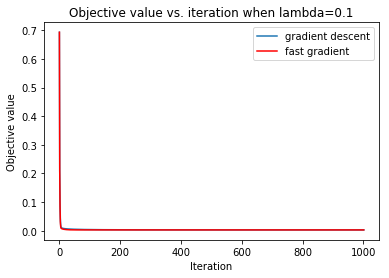

In [25]:
betas_grad = graddescent(beta_init, lambduh, eta_init, maxiter)
betas_fastgrad = fastgradalgo(beta_init, theta_init, lambduh, eta_init, maxiter)


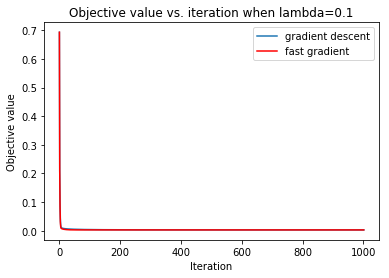

In [58]:
objective_plot(betas_grad, betas_fastgrad, lambduh, save_file='objective_plot_output.png')

In [26]:
# lab4-part1.html
def predict(beta, X_test):
    """
    Given new observations in X_test, predict their labels.
    :param beta: Estimated coefficients
    :param X_test: New observations
    :return: predictions: The predicted labels for the observations in X_test
    """
    #beta = np.reshape(beta, (2049,1))
    # Note that we only need to compute the numerator of the probability expressions that
    # are earlier in this file, since the denominators are the same for all of them.
    #exp_term = np.exp(beta[0, :] + X_test.dot(beta[0:, :]))  # Nxk matrix of exp(beta_{j0} + beta_j^Tx_i) for all i,j
    #exp_term = np.exp(beta[0] + X_test.dot(beta))  # Nxk matrix of exp(beta_{j0} + beta_j^Tx_i) for all i,j
    #exp_term = np.hstack((exp_term, np.ones(np.size(exp_term, 0))[:, np.newaxis])) # Add 1's for last term
    multiclasslogodds = (np.dot(X_test, beta.T))
    multiclassprobs = np.exp(multiclasslogodds) / (1 + np.exp(multiclasslogodds))
    predictions = np.argmax(multiclassprobs,axis=1)
    
    
    #predictions = np.argmax(exp_term, axis=1)
    return predictions

In [32]:
# My algorithm did not stop at the same location as sklearn's, so the estimated betas will be different.
#beta = betas_cyclic[0]
predictions = predict(betas_grad, X_test)

In [33]:
predictions

array([ 811,  864,  823,  836, 1000,  957, 1000, 1000, 1000, 1000,  888,
        919,  875,  801, 1000,  894,  868, 1000, 1000,  865,  887, 1000,
        967, 1000, 1000, 1000,  862,  938,  863,  968,  854,  995,  824,
       1000,  906,  840,  885,  860, 1000,  942,  849,  849,  893,  845,
        827,  886,  819,  892,  866,  850,  824, 1000,  803,  867, 1000,
        940, 1000, 1000,  886,  881,  803, 1000, 1000,  851, 1000, 1000,
        911,  874, 1000,  925,  873,  837,  899, 1000,  842, 1000, 1000,
        908,  876,  837,  918,  854,  875,  838,  871,  850,  808, 1000,
       1000,  887,  964, 1000, 1000,  877,  916, 1000,  952,  836,  906,
        861,  850,  908,  857,  871, 1000,  905,  891,  861,  920, 1000,
        934,  865, 1000, 1000,  885,  840,  923,  870, 1000, 1000, 1000,
        848,  913,  838,  901,  990,  919,  856,  863,  977,  857,  916,
        856,  909, 1000,  831, 1000, 1000,  890,  854,  978,  888,  845,
        846, 1000,  916,  905,  911,  914, 1000,  9

In [36]:
n_train = len(y_train)
n_test = len(y_test)
# Part (i): Compare to scikit-learn
lr = sklearn.linear_model.LogisticRegression(penalty='l2', C=1/(2*lambduh*n_train), fit_intercept=False, tol=10e-8, max_iter=1000)
lr.fit(x_train, y_train)
#print(lr.coef_)
#print(betas_fastgrad[-1, :])

#print(objective(betas_fastgrad[-1, :], lambduh))
#print(objective(lr.coef_.flatten(), lambduh))


# Part (j): Run cross-validation to find lambda. Plot the objective values and misclassification errors
def compute_misclassification_error(beta_opt, x, y):
    y_pred = 1/(1+np.exp(-x.dot(beta_opt))) > 0.5
    y_pred = y_pred*2 - 1  # Convert to +/- 1
    return np.mean(y_pred != y)


def plot_misclassification_error(betas_grad, betas_fastgrad, x, y, save_file='', title=''):
    niter = np.size(betas_grad, 0)
    error_grad = np.zeros(niter)
    error_fastgrad = np.zeros(niter)
    for i in range(niter):
        error_grad[i] = compute_misclassification_error(betas_grad[i, :], x, y)
        error_fastgrad[i] = compute_misclassification_error(betas_fastgrad[i, :], x, y)
    fig, ax = plt.subplots()
    ax.plot(range(1, niter + 1), error_grad, label='gradient descent')
    ax.plot(range(1, niter + 1), error_fastgrad, c='red', label='fast gradient')
    plt.xlabel('Iteration')
    plt.ylabel('Misclassification error')
    if title:
        plt.title(title)
    ax.legend(loc='upper right')
    if not save_file:
        plt.show()
    else:
        plt.savefig(save_file)



Optimal lambda= 21.5443469003
Gradient descent iteration 100
Gradient descent iteration 200
Gradient descent iteration 300
Gradient descent iteration 400
Gradient descent iteration 500
Gradient descent iteration 600
Gradient descent iteration 700
Gradient descent iteration 800
Gradient descent iteration 900
Gradient descent iteration 1000
Fast gradient iteration 100
Fast gradient iteration 200
Fast gradient iteration 300
Fast gradient iteration 400
Fast gradient iteration 500
Fast gradient iteration 600
Fast gradient iteration 700
Fast gradient iteration 800
Fast gradient iteration 900
Fast gradient iteration 1000


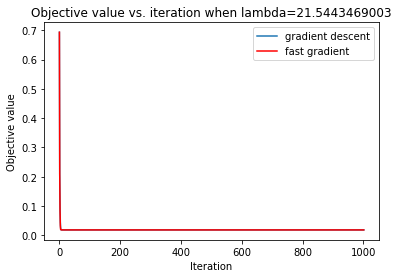

In [37]:
lr_cv = sklearn.linear_model.LogisticRegressionCV(penalty='l2', fit_intercept=False, tol=10e-8, max_iter=1000)
lr_cv.fit(x_train, y_train)
optimal_lambda = lr_cv.C_[0]
print('Optimal lambda=', optimal_lambda)

betas_grad_op = graddescent(beta_init, optimal_lambda, eta_init, maxiter)
betas_fastgrad_op = fastgradalgo(beta_init, theta_init, optimal_lambda, eta_init, maxiter)

objective_plot(betas_grad_op, betas_fastgrad_op, optimal_lambda, save_file='Objective_plot_optimal_lambda.png')



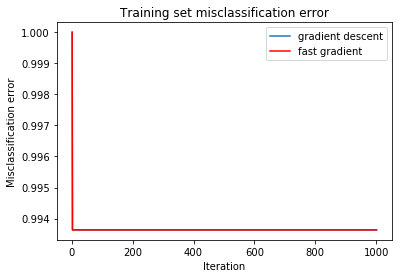

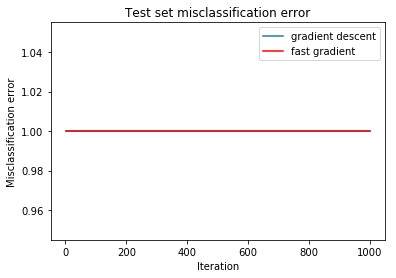

In [39]:
plot_misclassification_error(betas_grad_op, betas_fastgrad_op, x_train, y_train, save_file='misclassification_error_optimal_lambda.png',
                             title='Training set misclassification error')
plot_misclassification_error(betas_grad_op, betas_fastgrad_op, X_test, y_test, save_file='misclassification_error_optimal_lambda.png',
                             title='Test set misclassification error')

In [41]:
test_features = pd.read_csv('test_features/test_features.csv')
test_labels = pd.read_csv('test_features/test_labels.csv')

In [42]:
test_features = np.asarray(test_features.iloc[:,1:])
#labels = np.asarray(labels.iloc[:,0])
test_labels=np.asarray(test_labels.iloc[:,1])

In [43]:
tl =[test_labels[i].split('.')[0] for i in range (len(test_labels))]
tl

['871',
 '1846',
 '796',
 '2771',
 '2168',
 '2510',
 '716',
 '1938',
 '384',
 '2574',
 '377',
 '3190',
 '942',
 '220',
 '1970',
 '3637',
 '2690',
 '2115',
 '2102',
 '581',
 '3788',
 '2920',
 '2131',
 '3056',
 '2595',
 '1811',
 '1090',
 '1945',
 '4038',
 '4318',
 '2385',
 '2777',
 '1073',
 '1796',
 '4198',
 '85',
 '2606',
 '4010',
 '2232',
 '2149',
 '2957',
 '1288',
 '323',
 '2301',
 '3942',
 '3743',
 '3461',
 '1399',
 '417',
 '3367',
 '2039',
 '547',
 '3652',
 '1503',
 '1663',
 '2436',
 '2352',
 '177',
 '1395',
 '2084',
 '1962',
 '437',
 '2969',
 '2873',
 '1314',
 '2205',
 '3963',
 '1250',
 '246',
 '3216',
 '2889',
 '3225',
 '3146',
 '873',
 '53',
 '51',
 '1130',
 '1385',
 '71',
 '3834',
 '593',
 '2880',
 '602',
 '345',
 '4295',
 '1641',
 '3428',
 '638',
 '487',
 '242',
 '3726',
 '1547',
 '1320',
 '730',
 '1639',
 '1620',
 '2302',
 '441',
 '410',
 '1794',
 '1592',
 '1245',
 '2707',
 '2850',
 '131',
 '575',
 '174',
 '1486',
 '2257',
 '3048',
 '380',
 '589',
 '2064',
 '3198',
 '3852',
 '

In [61]:
betas_grad_predictions = predict(betas_grad, test_features)
betas_grad_predictions

array([ 870, 1000,  907, ..., 1000, 1000, 1000], dtype=int64)

In [45]:
betas_fastgrad_predictions = predict(betas_fastgrad, test_features)
betas_fastgrad_predictions

array([65, 71, 66, ..., 72, 68, 72], dtype=int64)

In [46]:
betas_grad_op_predictions = predict(betas_grad_op, test_features)
betas_grad_op_predictions

array([8, 7, 9, ..., 7, 8, 8], dtype=int64)

In [47]:
betas_fastgrad_op_predictions = predict(betas_fastgrad_op, test_features)
betas_fastgrad_op_predictions

array([5, 5, 5, ..., 5, 5, 5], dtype=int64)

In [56]:
z = np.stack((tl,betas_fastgrad_predictions), 1)
z

array([['871', '5'],
       ['1846', '5'],
       ['796', '5'],
       ..., 
       ['4268', '5'],
       ['1195', '5'],
       ['2193', '5']], 
      dtype='<U21')

In [57]:
import os
path_file = os.getcwd()+'\Yte.csv'
path_file 
ZX = pd.DataFrame(z)
ZX.columns = ['ID','Prediction']
ZX.to_csv(path_file, header=True,index=False)